## Import library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

## Read DataSet

In [2]:
df = pd.read_csv("advertising1.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
df['Clicked on Ad'].unique()

array([0, 1], dtype=int64)

In [7]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Data Preprocessing

In [8]:
df['Ad Topic Line'].unique()

array(['Cloned 5thgeneration orchestration',
       'Monitored national standardization',
       'Organic bottom-line service-desk',
       'Triple-buffered reciprocal time-frame',
       'Robust logistical utilization', 'Sharable client-driven software',
       'Enhanced dedicated support', 'Reactive local challenge',
       'Configurable coherent function',
       'Mandatory homogeneous architecture',
       'Centralized neutral neural-net',
       'Team-oriented grid-enabled Local Area Network',
       'Centralized content-based focus group',
       'Synergistic fresh-thinking array',
       'Grass-roots coherent extranet',
       'Persistent demand-driven interface',
       'Customizable multi-tasking website', 'Intuitive dynamic attitude',
       'Grass-roots solution-oriented conglomeration',
       'Advanced 24/7 productivity',
       'Object-based reciprocal knowledgebase',
       'Streamlined non-volatile analyzer',
       'Mandatory disintermediate utilization',
       'Futur

In [9]:
df.drop('Ad Topic Line' , axis = 1 , inplace = True)

In [10]:
df['Timestamp'].unique()

array(['2016-03-27 00:53:11', '2016-04-04 01:39:02',
       '2016-03-13 20:35:42', '2016-01-10 02:31:19',
       '2016-06-03 03:36:18', '2016-05-19 14:30:17',
       '2016-01-28 20:59:32', '2016-03-07 01:40:15',
       '2016-04-18 09:33:42', '2016-07-11 01:42:51',
       '2016-03-16 20:19:01', '2016-05-08 08:10:10',
       '2016-06-03 01:14:41', '2016-04-20 21:49:22',
       '2016-03-24 09:31:49', '2016-03-09 03:41:30',
       '2016-01-30 19:20:41', '2016-05-02 07:00:58',
       '2016-02-13 07:53:55', '2016-02-27 04:43:07',
       '2016-01-05 07:52:48', '2016-03-18 13:22:35',
       '2016-05-20 08:49:33', '2016-03-23 09:43:43',
       '2016-06-13 17:27:09', '2016-05-27 15:25:52',
       '2016-02-08 10:46:14', '2016-07-19 08:32:10',
       '2016-04-14 05:08:35', '2016-01-27 12:38:16',
       '2016-07-02 20:23:15', '2016-03-01 22:13:37',
       '2016-07-15 05:05:14', '2016-01-14 14:00:09',
       '2016-03-15 03:12:25', '2016-04-12 03:26:39',
       '2016-04-07 15:18:10', '2016-02-09 05:2

In [11]:
df.drop('Timestamp' , axis = 1, inplace = True)

In [12]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Clicked on Ad
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,0
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,0
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,0
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,0
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,0


## Handle Data

In [13]:
label_encoder = LabelEncoder()

In [14]:
df['City'] = label_encoder.fit_transform(df['City'])
df['Country'] = label_encoder.fit_transform(df['Country'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   City                      1000 non-null   int32  
 5   Male                      1000 non-null   int64  
 6   Country                   1000 non-null   int32  
 7   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int32(2), int64(3)
memory usage: 54.8 KB


## Data Visualization

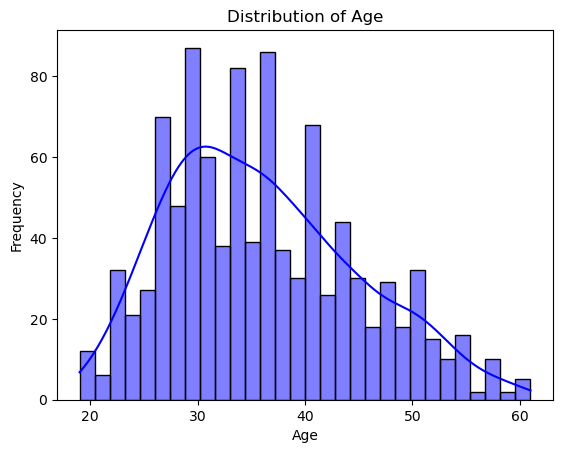

In [16]:
#histogram for the age column
sns.histplot(df['Age'], bins=30, kde=True, color='blue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Show the plot
plt.show()

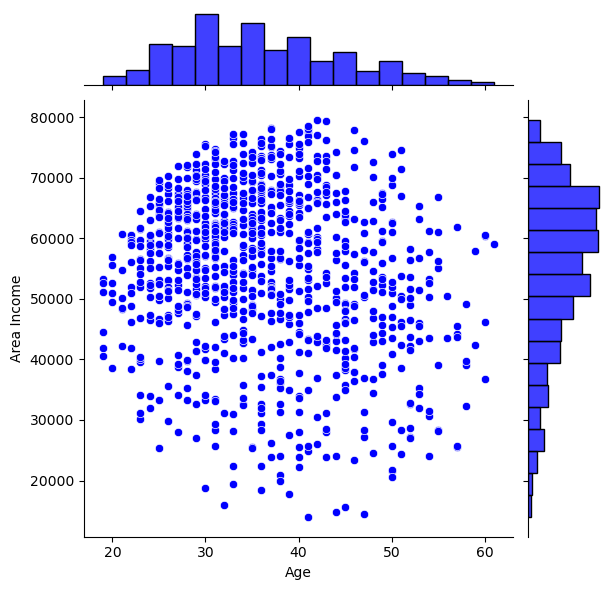

In [17]:
# Create a jointplot for 'Area Income' versus 'Age'
sns.jointplot(x='Age', y='Area Income', data=df, kind='scatter', color='blue')

# Show the plot
plt.show()

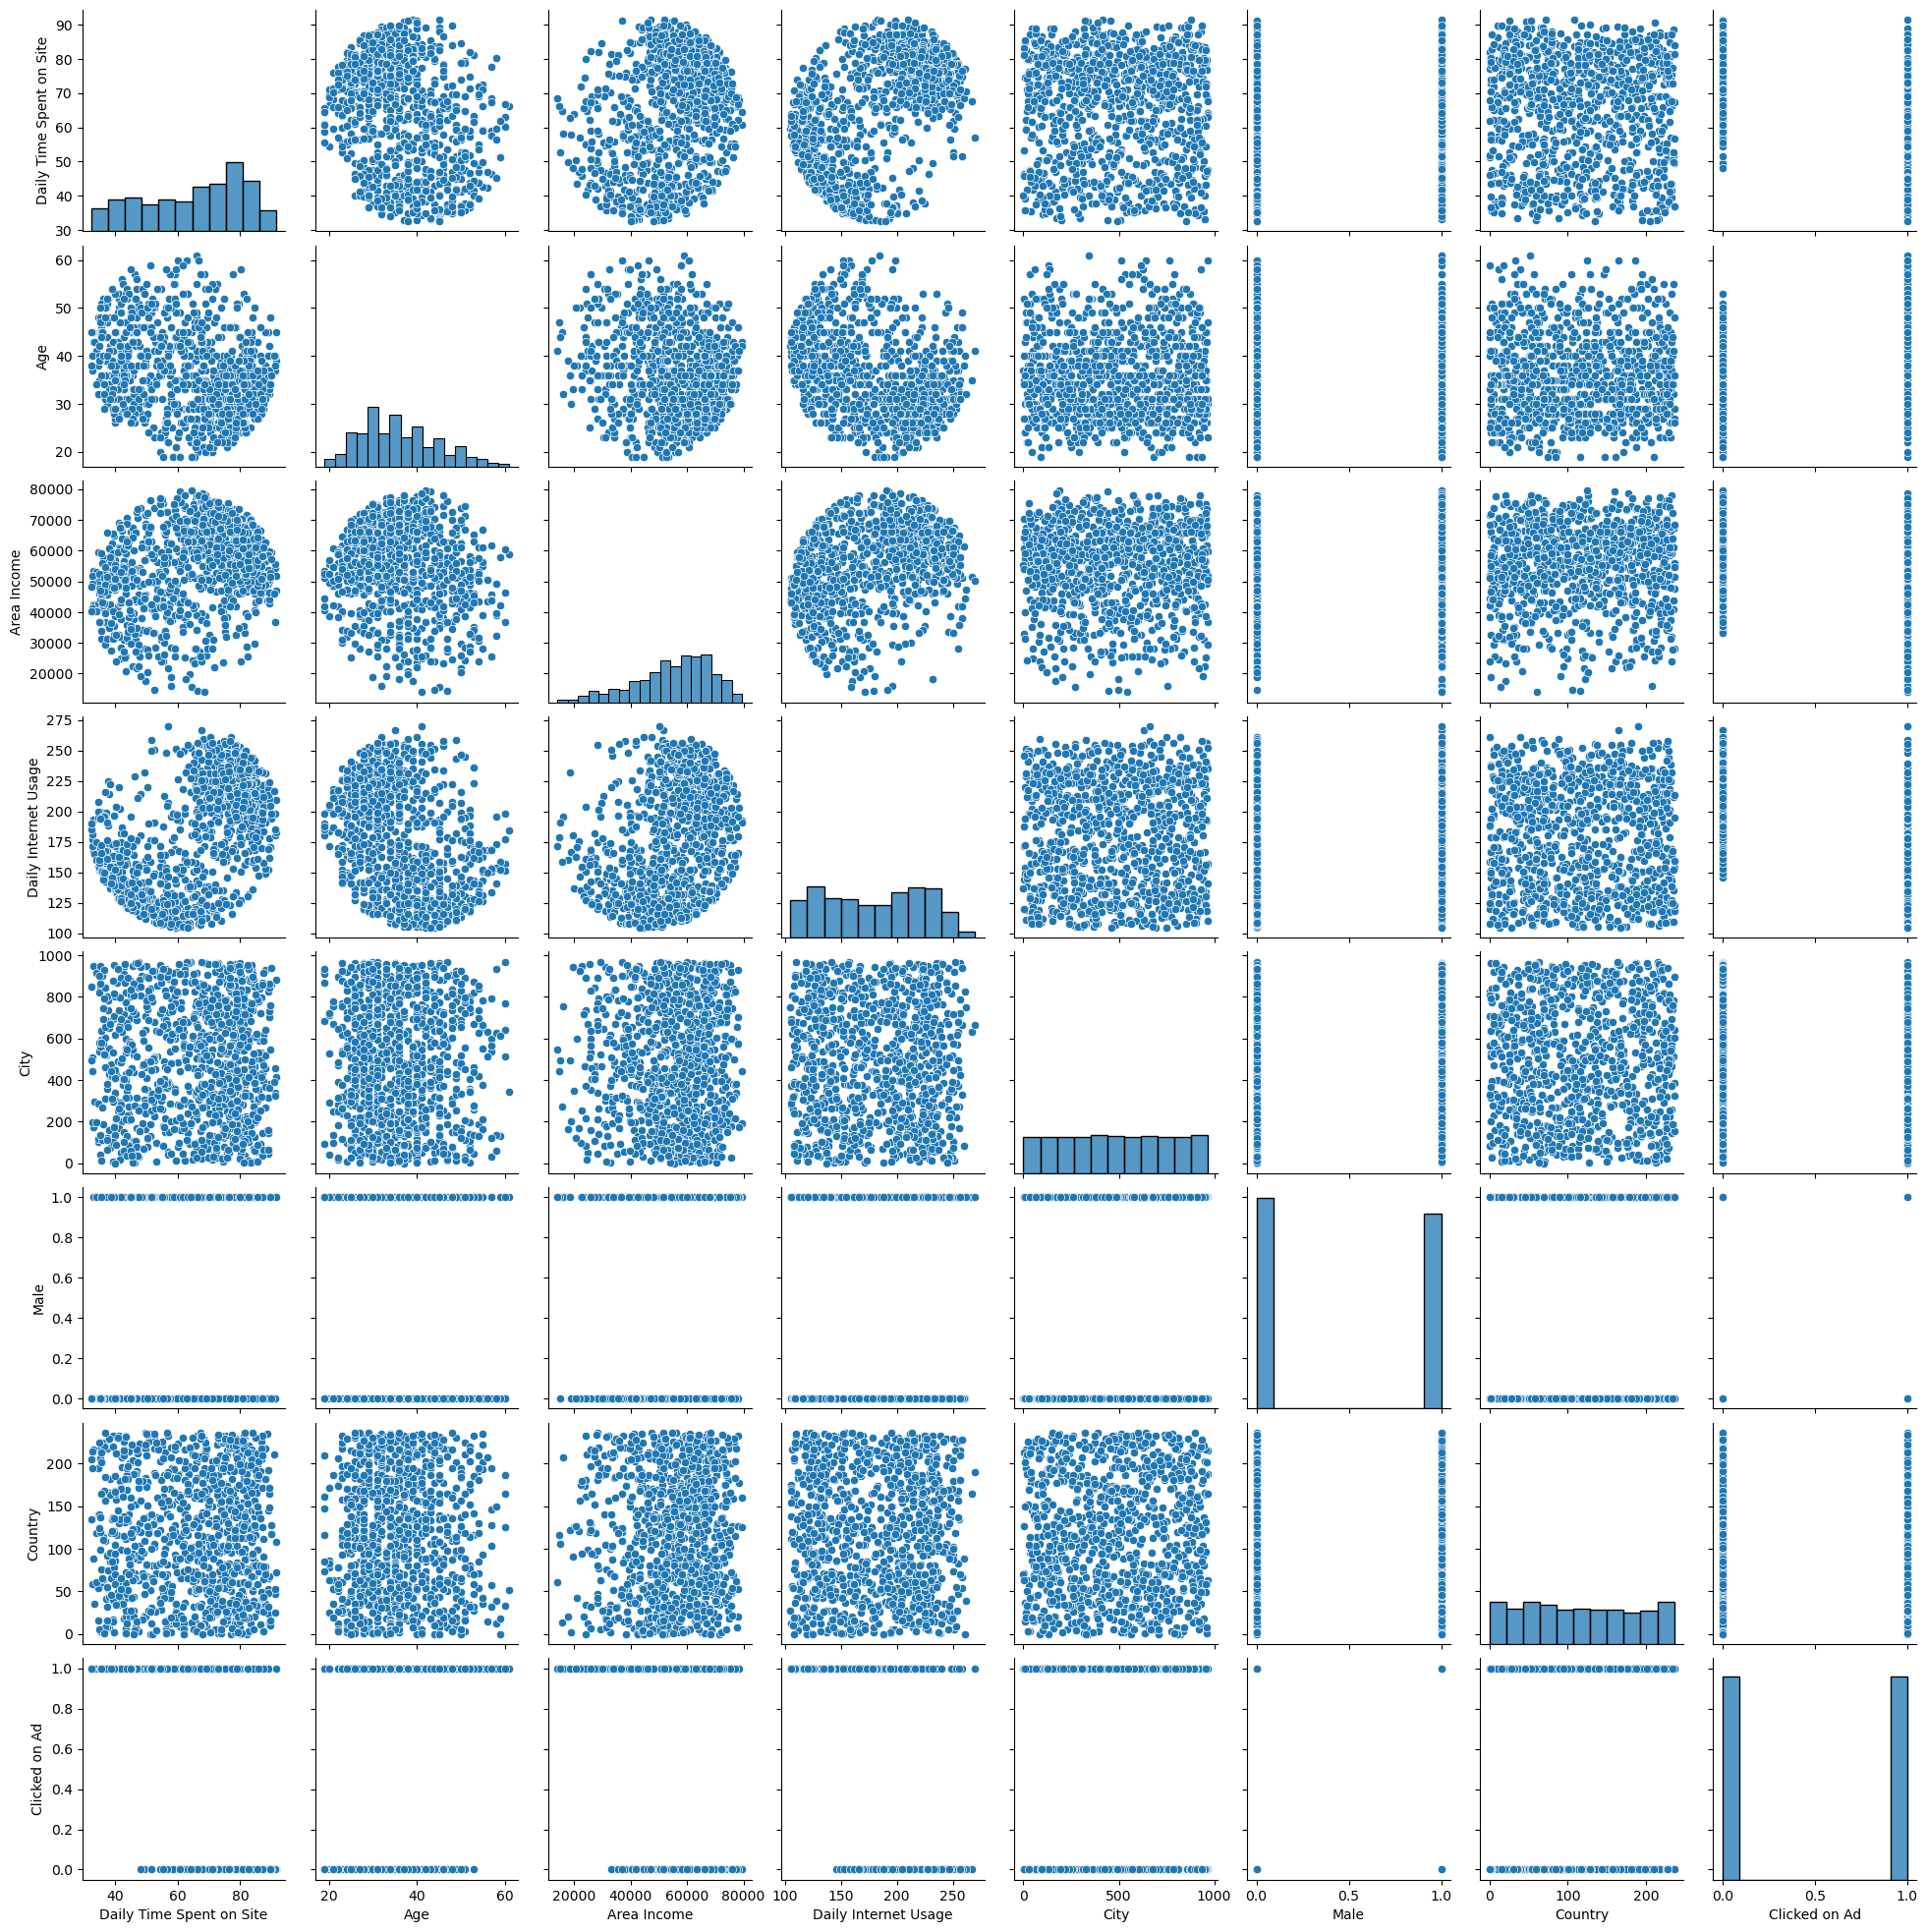

In [18]:
sns.pairplot(df)
plt.show()

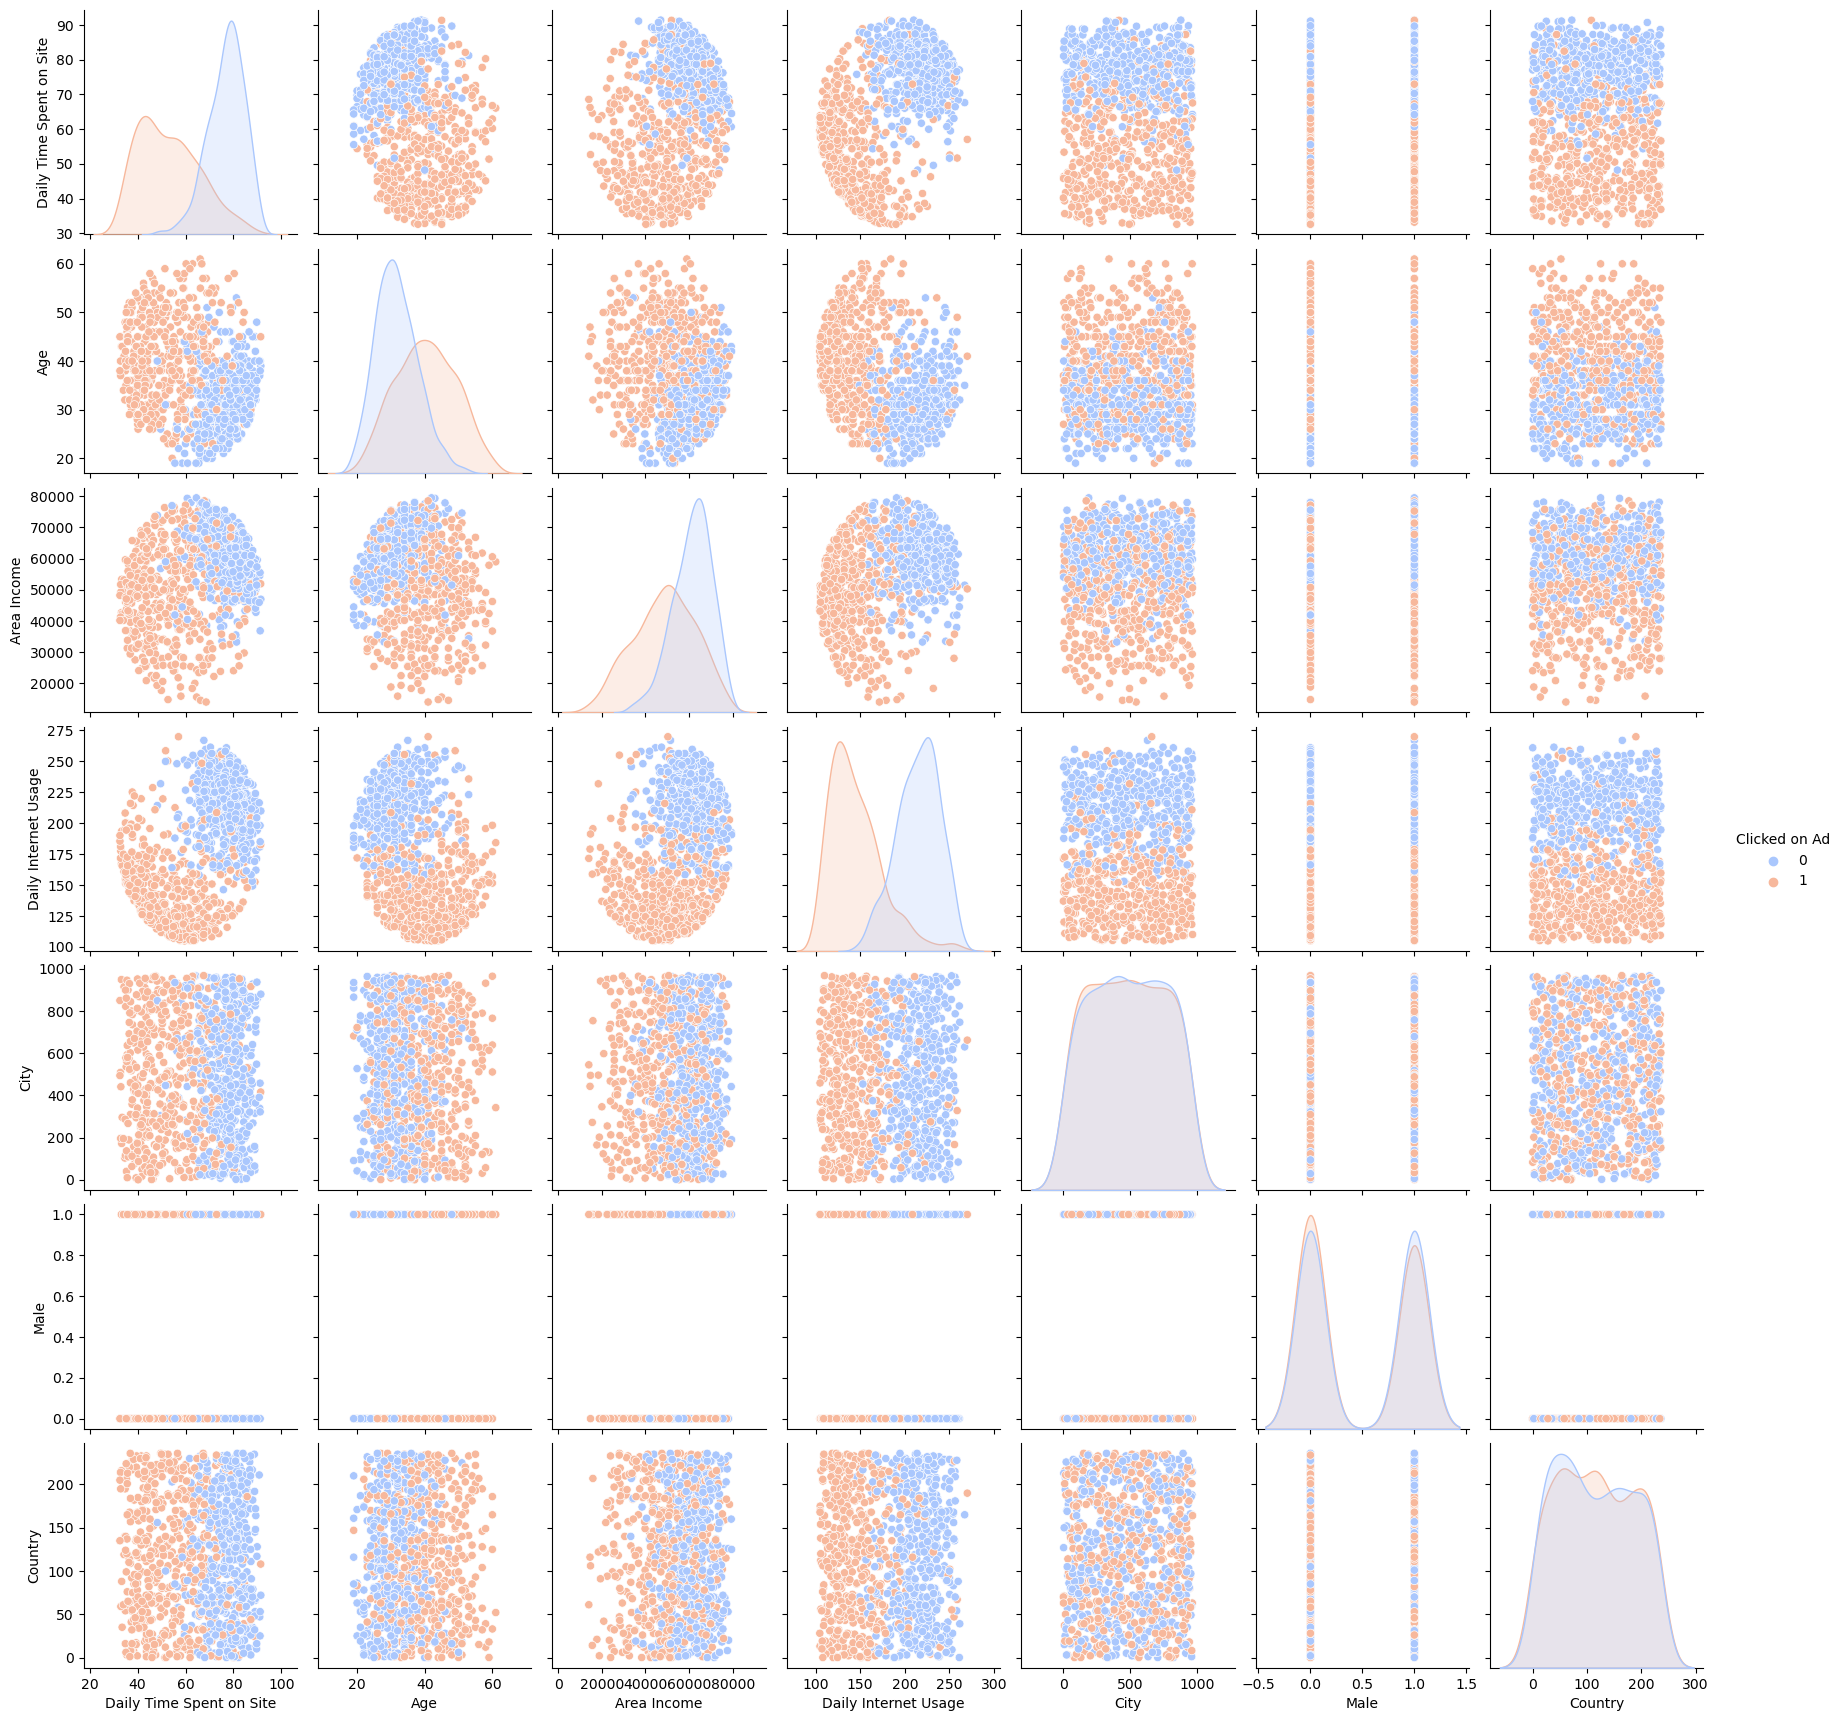

In [19]:
sns.pairplot(df, hue='Clicked on Ad', palette='coolwarm')
plt.show()

## Split Dataset

In [20]:
y = df['Clicked on Ad']
x = df.drop(columns = 'Clicked on Ad' , axis = 1)

In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [22]:
x.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country
0,68.95,35,61833.90,256.09,961,0,215
1,80.23,31,68441.85,193.77,903,1,147
2,69.47,26,59785.94,236.50,111,0,184
3,74.15,29,54806.18,245.89,939,1,103
4,68.37,35,73889.99,225.58,805,0,96


In [23]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42)

## Using Knn Model

In [24]:
knn_model = KNeighborsClassifier()

In [25]:
knn_model.fit(x_train , y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn_model.predict(x_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[63, 26],
       [42, 69]], dtype=int64)

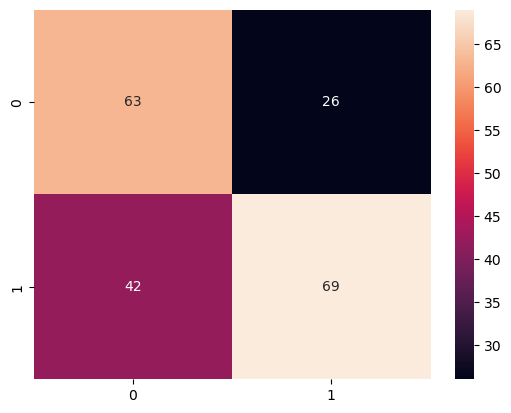

In [29]:
sns.heatmap(cm , annot = True)
plt.show()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65        89
           1       0.73      0.62      0.67       111

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.67      0.66      0.66       200



## Logistic Regression Model

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(x_train , y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred = lr.predict(x_test)

In [34]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[85,  4],
       [18, 93]], dtype=int64)

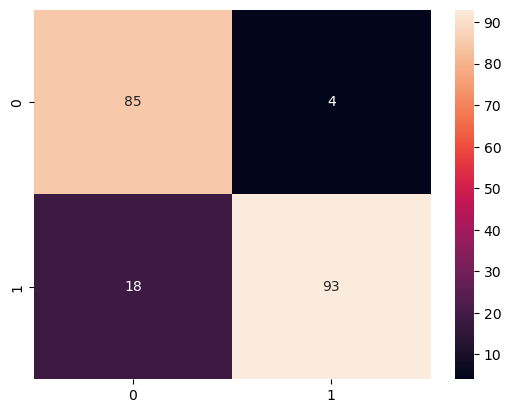

In [36]:
sns.heatmap(cm , annot = True)
plt.show()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        89
           1       0.96      0.84      0.89       111

    accuracy                           0.89       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.89      0.89       200



## Gaussian NB Model

In [38]:
gn = GaussianNB()

In [39]:
gn.fit(x_train, y_train)

GaussianNB()

In [40]:
y_pred = gn.predict(x_test)

In [41]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [42]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 83,   6],
       [  5, 106]], dtype=int64)

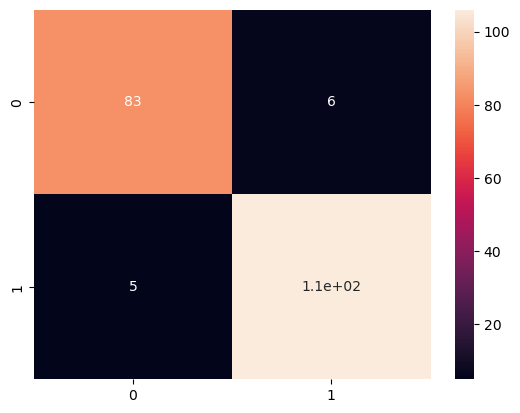

In [43]:
sns.heatmap(cm , annot = True)
plt.show()

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



## Unsing grid Search

In [45]:
# using grid search for model GaussianNB because give me high accuracy

In [46]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
}

In [47]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=gn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1.0]},
             scoring='accuracy')

In [48]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'var_smoothing': 1e-09}


In [49]:
print("Best Score:", grid_search.best_score_)

Best Score: 0.9712500000000001


In [50]:
gn = GridSearchCV(estimator=GaussianNB(), param_grid={'var_smoothing': [1e-09]}, cv=5, scoring='accuracy')
gn.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [57]:
# using grid search for model Logistic Regression just to try

In [58]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'], 
}

In [59]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [60]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}


In [61]:
print("Best Score:", grid_search.best_score_)

Best Score: 0.9137500000000001


In [62]:
y_pred = grid_search.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        89
           1       0.96      0.83      0.89       111

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.90      0.89      0.89       200

